In [50]:
import matplotlib.pyplot as plt
import networkx as nx


def get_node_key(layer, node):
    return f'L{layer+1}_N{node+1}'


def draw_neural_network(layers):
    G = nx.DiGraph()

    layer_top_nodes = []

    # Create nodes for each layer
    for i, layer in enumerate(layers):
        for j in range(layer):
            avg = layer / 2
            key = get_node_key(i, j)
            pos = (i, j - avg)
            if j == layer - 1:
                layer_top_nodes.append(pos)

            G.add_node(key, pos=pos)

    # Create edges between layers
    for i in range(len(layers) - 1):
        # 当前层所有节点
        for j in range(layers[i]):
            # 下一层所有节点
            for k in range(layers[i+1]):
                G.add_edge(get_node_key(i, j), get_node_key(i+1, k))

    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=False, arrows=True,
            node_size=1000, node_color='white', edgecolors='black',)

    labels = ['n_in', 'n_hidden', 'n_out']
    for i, pos in enumerate(layer_top_nodes):
        plt.text(pos[0], pos[1]+0.4, labels[i], ha='center',
                 va='center', fontsize=12, color='black')

    plt.show()

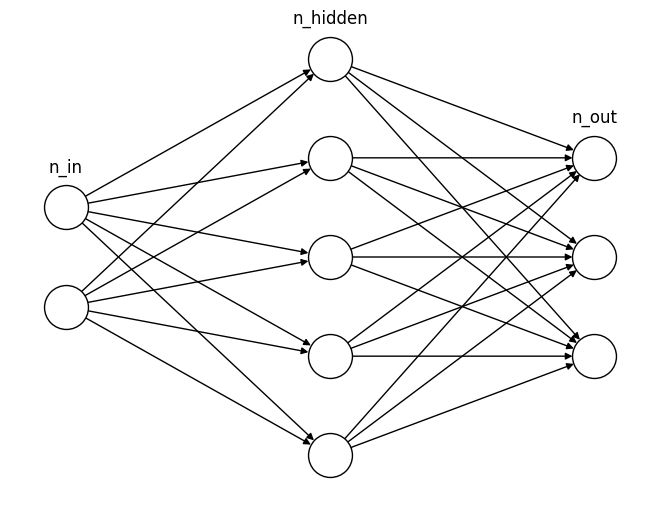

In [51]:
layers = [2, 5, 3]  # 表示3个节点的输入层，5个节点的第一个隐藏层，4个节点的第二个隐藏层，2个节点的输出层
draw_neural_network(layers)